In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [12]:
data_train_path = r'C:\Users\asdfg\Downloads\Image_classification\Fruits_Vegetables\train'
data_test_path = r'C:\Users\asdfg\Downloads\Image_classification\Fruits_Vegetables\test'
data_val_path = r'C:\Users\asdfg\Downloads\Image_classification\Fruits_Vegetables\validation'

In [13]:
img_width = 180
img_height =180 

In [14]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [15]:
data_cat = data_train.class_names

In [16]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [18]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [19]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


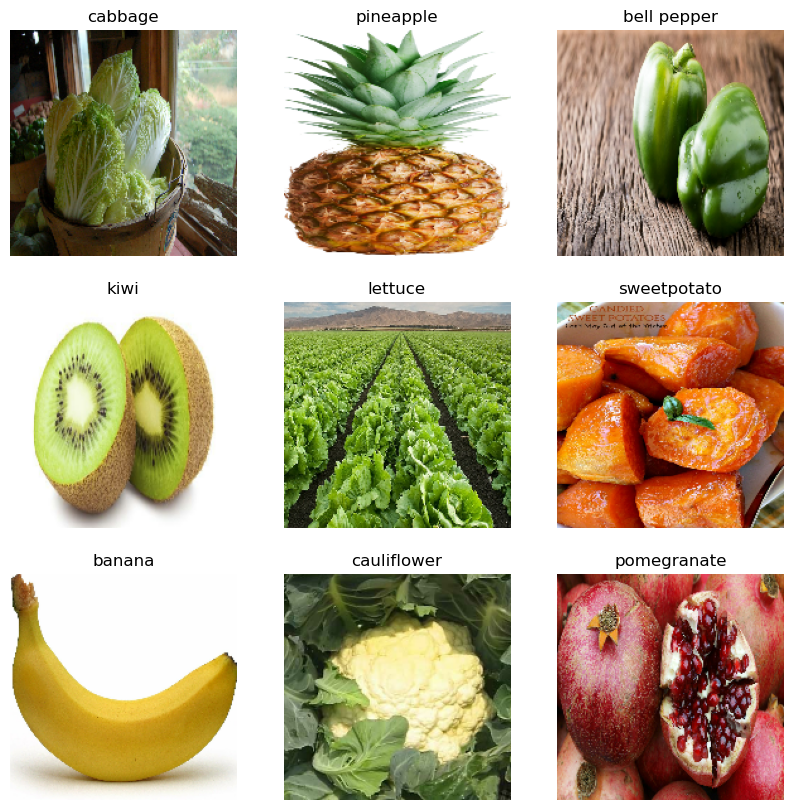

In [20]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [24]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [25]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 543ms/step - accuracy: 0.0919 - loss: 3.4568 - val_accuracy: 0.4131 - val_loss: 2.0939
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 430ms/step - accuracy: 0.3344 - loss: 2.3577 - val_accuracy: 0.5157 - val_loss: 1.4806
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 411ms/step - accuracy: 0.5050 - loss: 1.7241 - val_accuracy: 0.8063 - val_loss: 0.6988
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 409ms/step - accuracy: 0.7007 - loss: 1.0343 - val_accuracy: 0.9231 - val_loss: 0.3738
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 399ms/step - accuracy: 0.8589 - loss: 0.5157 - val_accuracy: 0.9316 - val_loss: 0.3911
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - accuracy: 0.9168 - loss: 0.3354 - val_accuracy: 0.9430 - val_loss: 0.3583
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 376ms/step - accuracy: 0.9540 - loss: 0.2168 - val_accuracy: 0.9573 - val_loss: 0.3556
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 377ms/step - accuracy: 0.9626 - loss: 0.1704 - val_accu

Text(0.5, 1.0, 'Loss')

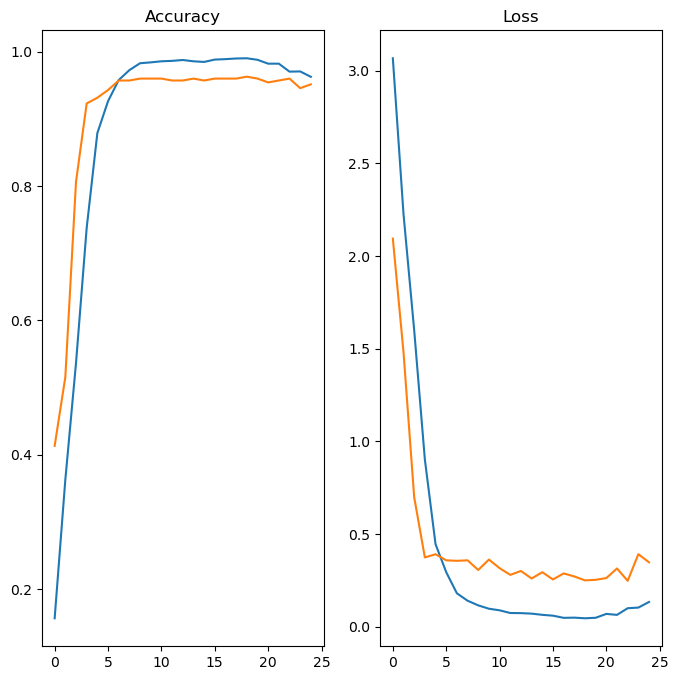

In [26]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [27]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [28]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [29]:
score = tf.nn.softmax(predict)

In [30]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 63.51


In [31]:
model.save('Image_classify.keras')